In [1]:
import pymongo
conn = pymongo.MongoClient('selnpcgwnx1004', 8888)
db = conn.stdata                 

In [2]:
CP_names = [u'Node__Check_Config_Activation_Time',
 u'Dallas__No_DPFcrashes',
 u'Dallas__No_Crashes',
 u'TC00__Check_New_Sessions_Created_After_Kill_Gtpcd_on_PSC',
 u'TC00__Check_Alarm_After_PPB_Failure',
 u'TC00__No_Emerg_Errors_Warnings_During_Stability',
 u'Dallas__No_Critical_Errors',
 u'TC00__Check_Board_Allocation_After_Kill_Gtpcd_on_GSC',
 u'TC00__Check_Alarm_After_Kill_Sgwcd_on_PSC',
 u'TC00__Check_Active_Notification_At_BH',
 u'TC00__Increase_In_Number_Of_System_Alarms',
 u'TC00__Check_Board_Allocation_After_Kill_Gtpcd_on_PSC',
 u'Node__Check_No_Pending_PGW_Ftp_CDRs',
 u'Robustness__Check_ISPlog',
 u'Robustness__Negative_Node_Counter_Check',
 u'Robustness__Board_Status_Check_ervlog',
 u'TC00__Check_Board_Allocation_After_PPB_Failure',
 u'Node__Check_No_Pending_PGW_Gtpp_CDRs',
 u'TC00__Dallas_Signaling_Check_During_Stability',
 u'TC00__Check_New_Sessions_Created_After_PPB_Failure',
 u'TC00__Increase_In_Number_Of_EPG_Alarms',
 u'TC00__total_execution_time',
 u'Node__Check_No_CDR_Failures',
 u'Node__No_Coredumps',
 u'TC00__Check_Board_Allocation_After_Kill_Sgwcd_on_PSC',
 u'TC00__Check_Active_Notification_In_The_End',
 u'TC00__Check_Node_Log_During_Robustness',
 u'TC00__Check_Alarm_After_Kill_Gtpcd_on_GSC',
 u'TC00__check_flooding_messages',
 u'TC00__Check_New_Sessions_Created_After_Kill_Gtpcd_on_GSC',
 u'Node__Check_No_Pending_SGW_Bp_CDRs',
 u'TC00__Check_Unexpected_Alarms',
 u'TC00__Threshold_Value_PGW_Contexts',
 u'TC00__Check_New_Sessions_Created_After_Kill_Sgwcd_on_PSC',
 u'Robustness__Check_Requirement_PSC_Recovery_Time_of_Kill_Gtpcd_on_PSC',
 u'Robustness__Too_Big_Node_Counter_Check',
 u'Robustness__All_UE_Detached_In_The_End',
 u'TC00__No_Coredump_During_Stability',
 u'Robustness__Board_Status_Check_ervshelllog',
 u'TC00__Robustness__Check_Requirement_Recovery_Time_of_Activate_GSC_on_Spare_After_Kill_Gtpcd_on_GSC',
 u'Common__No_Testcase_Errors',
 u'Robustness__Missing_Route_Check',
 u'TC00__Check_Alarm_After_Kill_Gtpcd_on_PSC',
 u'Node__Check_Config_Save_Time',
 u'Robustness__Check_Requirement_Recovery_Time_of_PGWU_resilience_For_PPB_Failure',
 u'TC00__Threshold_Value_SGW_Contexts',
 u'Node__Check_Commit_Time',
 u'Robustness__Check_Requirement_Payload_Interruption_Time_For_PPB_Failure',
 u'Node__Check_No_Pending_SGW_Rf_CDRs',
 u'TC00__Dallas_Payload_Check_During_Stability',
 u'Robustness__Reached_BH_With_No_Failure',
 u'Robustness__No_New_Active_Alarm_In_The_End',
 u'TC00__Robustness__Check_Active_Notification_At_BH',
 u'Common__Testcase_Valid',
 u'Node__SGW_CPB_Process_Start_Error',
 u'Node__PGW_PPB_Process_Start_Error',
 u'Node__No_Configuration_Errors',
 u'Robustness__Check_Requirement_Recovery_Time_of_Activate_GSC_on_Spare_After_Kill_Gtpcd_on_GSC',
 u'Robustness__Check_Active_Notification_At_BH',
 u'Robustness__No_Active_Alarm_In_The_End',
 u'Robustness__Payload_Interruption_Time_For_PPB_Failure',
 u'Robustness__Recovery_Time_of_Activate_GSC_on_Spare_After_Kill_Gtpcd_on_GSC',
 u'Robustness__Recovery_Time_of_PGWU_resilience_For_PPB_Failure',
 u'Robustness__PSC_Recovery_Time_of_Kill_Gtpcd_on_PSC',
 u'Demo__Threshold_value_pgw_contexts',
 u'Node__Check_Config_File_Size',
 u'Node__Check_Config_Nr_MO_Classes',
 u'Node__Check_Config_Nr_Attributes',
 u'CP_Error',
 u'Robustness__Board_Status_Check']

failure_reason_verbose_dict = {
    "EPG-platform"   : 0,
    "EPG-application": 1,
    "EPGCATS"        : 2,
    "Dallas"         : 3, 
    "ITTE"           : 4, 
    "AutoTT"         : 5,
    "Portal"         : 6,
    "Verdict"        : 7,
    "SSR-sim"        : 8,
    "EQDB"           : 9, 
    "Outline"        : 10
}

failure_reason_dict = {
    "EPG-platform"   : 0,
    "EPG-application": 1,
    "EPGCATS"        : 1,
    "Dallas"         : 0, 
    "ITTE"           : 0, 
    "AutoTT"         : 0,
    "Portal"         : 0,
    "Verdict"        : 0,
    "SSR-sim"        : 0,
    "EQDB"           : 0, 
    "Outline"        : 0
}

failure_reason = failure_reason_dict.keys()

In [3]:
import pandas as pd
import numpy as np
import re

df_CP = pd.DataFrame(columns = CP_names)
df_failure_reason = pd.DataFrame(columns = failure_reason)

cursor = db.hourly.find({"comment": {"$regex": "Failure reasons"}},{"CP_results": 1, "comment": 1, "job_id": 1,  "_id":0})

#doc = cursor.next()

for doc in cursor:

    job_id = doc["job_id"]

    ### CP
    df_job_cp = pd.DataFrame(np.zeros((1,len(CP_names))), index=[job_id], columns = CP_names)

    for CP in doc["CP_results"]:
        if doc["CP_results"][CP] == "FAIL":
            df_job_cp[CP] =+1
                      
    ### Failure Reason
    df_job_fr = pd.DataFrame(np.zeros((1,len(failure_reason))), index=[job_id], columns = failure_reason)
    
    comment = doc["comment"]
    for fr in failure_reason:
        if re.search(fr, comment):
            df_job_fr[fr] +=1
            break
    else:
        print "no match! Job id: %s" %job_id 
    df_CP = df_CP.append(df_job_cp)
    df_failure_reason = df_failure_reason.append(df_job_fr)

array_failure_reason = np.zeros(df_failure_reason.shape[0])
array_failure_reason_verbose  = np.zeros(df_failure_reason.shape[0])

for i in range(df_failure_reason.shape[0]):
    a = df_failure_reason.iloc[i]
    for key in failure_reason_dict:
        if a[a>0].index == key:
            array_failure_reason[i] = failure_reason_dict[key]
            break
            
for i in range(df_failure_reason.shape[0]):
    a = df_failure_reason.iloc[i]
    for key in failure_reason_verbose_dict:
        if a[a>0].index == key:
            array_failure_reason_verbose[i] = failure_reason_verbose_dict[key]
            break    

In [4]:
### Merge minor CPs

def cp_merge(cp_list, df, src_cp, dst_cp):
    cp_list.remove(src_cp)
    df[dst_cp] = df[dst_cp] + df[src_cp]
    return cp_list, df.reindex(columns= cp_list)

CP_names, df_CP = cp_merge(CP_names, df_CP,"TC00__Check_Active_Notification_In_The_End", "Robustness__No_Active_Alarm_In_The_End")
CP_names, df_CP = cp_merge(CP_names, df_CP,"Robustness__No_New_Active_Alarm_In_The_End", "Robustness__No_Active_Alarm_In_The_End")
CP_names, df_CP = cp_merge(CP_names, df_CP,"TC00__Robustness__Check_Requirement_Recovery_Time_of_Activate_GSC_on_Spare_After_Kill_Gtpcd_on_GSC", "Robustness__Check_Requirement_Recovery_Time_of_Activate_GSC_on_Spare_After_Kill_Gtpcd_on_GSC")
CP_names, df_CP = cp_merge(CP_names, df_CP,"TC00__Robustness__Check_Active_Notification_At_BH", "Robustness__Check_Active_Notification_At_BH")
CP_names, df_CP = cp_merge(CP_names, df_CP,"TC00__Check_Active_Notification_At_BH", "Robustness__Check_Active_Notification_At_BH")

### Remove duplicate or all zeros CP data
dup_cp = ['Node__Check_Commit_Time', 
          'Node__Check_Config_File_Size', 
          'Node__Check_Config_Save_Time', 
          'CP_Error', 
          'Dallas__No_Critical_Errors',
          'Node__Check_Config_Nr_MO_Classes',
          'Dallas__No_DPFcrashes', 
          'Node__Check_Config_Nr_Attributes', 
          'Node__Check_Config_Activation_Time']

df_CP = df_CP.drop(dup_cp, 1)


In [5]:
fr_distribution = df_failure_reason.sum()
print("Failure Reason Distribution:")
print fr_distribution
print("\nTotal number of failed CI Hourly test jobs: %s" %df_CP.shape[0])
#plt.bar([i + 0.1 for i in range(len(a.index))], a.values, 1)
#plt.xticks([i + 0.5 for i in range(len(a.index))],a.index)
print("Bad Delivery(EPG-application + EPGCATS): %s" 
      %(fr_distribution["EPG-application"] + fr_distribution["EPGCATS"]))
print("Environment Problem(platform, Dallas,ITTE,AutoTT,etc): %s" 
      %(df_CP.shape[0] - fr_distribution["EPG-application"] - fr_distribution["EPGCATS"]))

Failure Reason Distribution:
EPG-application    585.0
Outline              1.0
EPG-platform        45.0
Dallas              53.0
Verdict              7.0
EQDB                 8.0
EPGCATS             40.0
ITTE                80.0
AutoTT              18.0
Portal               4.0
SSR-sim             65.0
dtype: float64

Total number of failed CI Hourly test jobs: 906
Bad Delivery(EPG-application + EPGCATS): 625.0
Environment Problem(platform, Dallas,ITTE,AutoTT,etc): 281.0


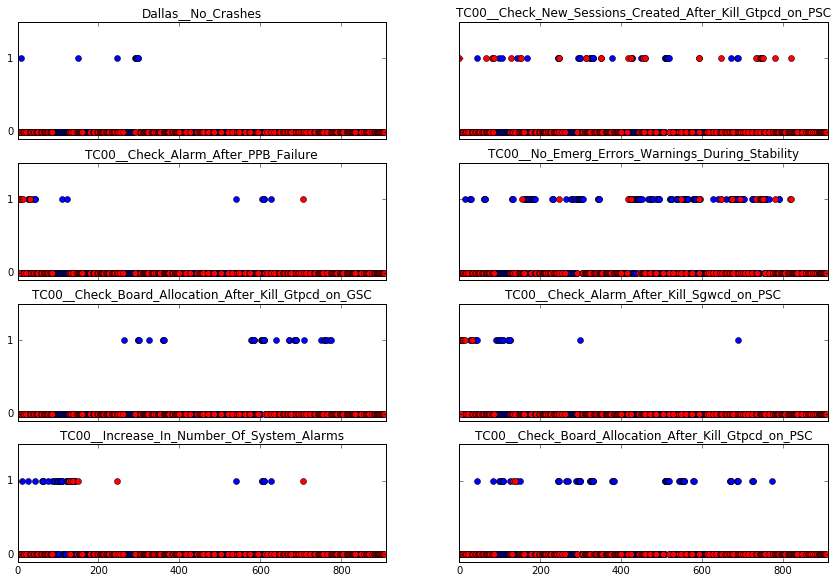

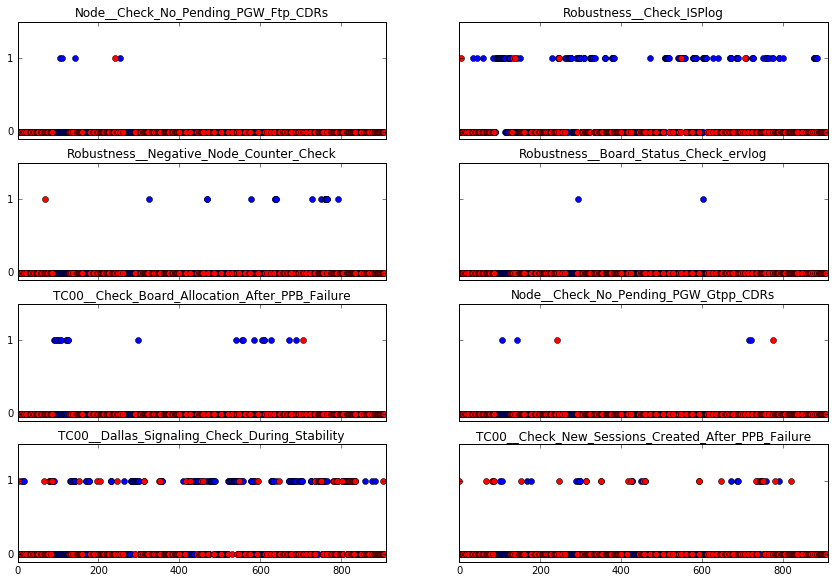

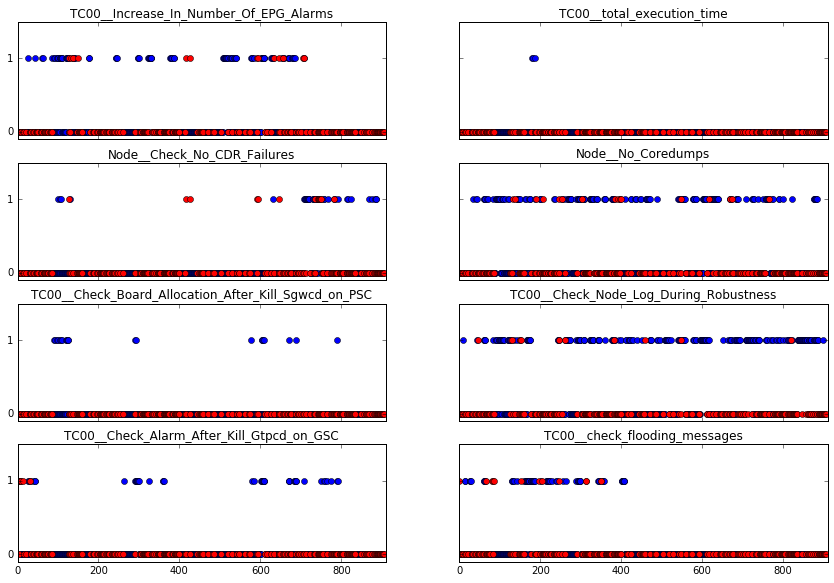

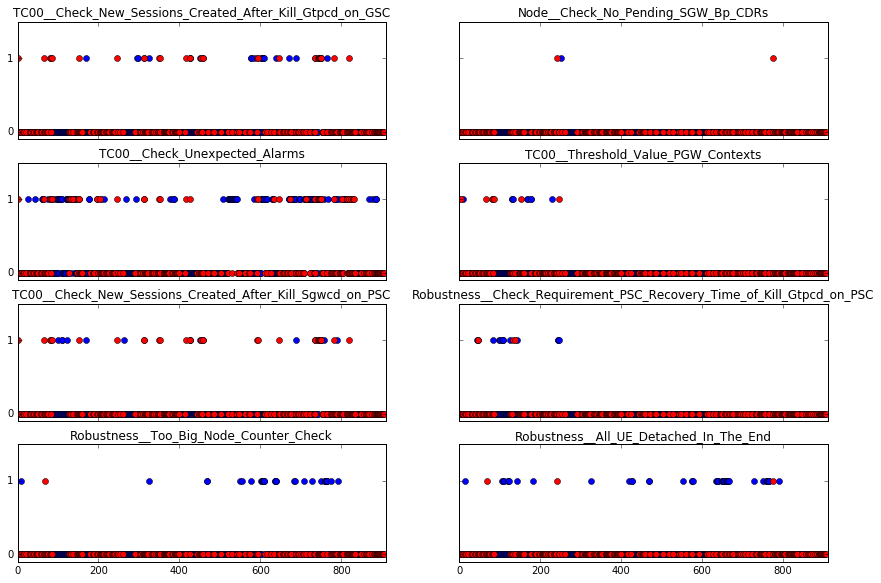

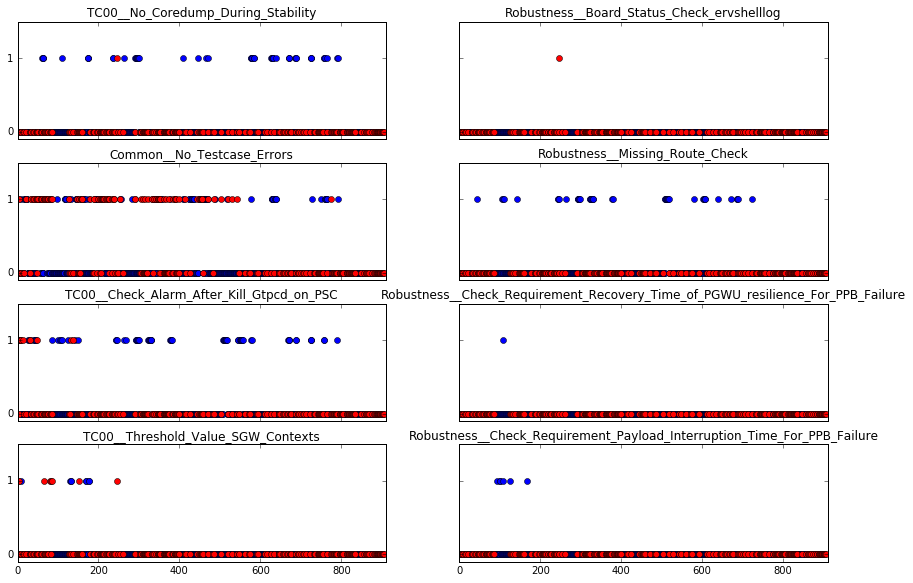

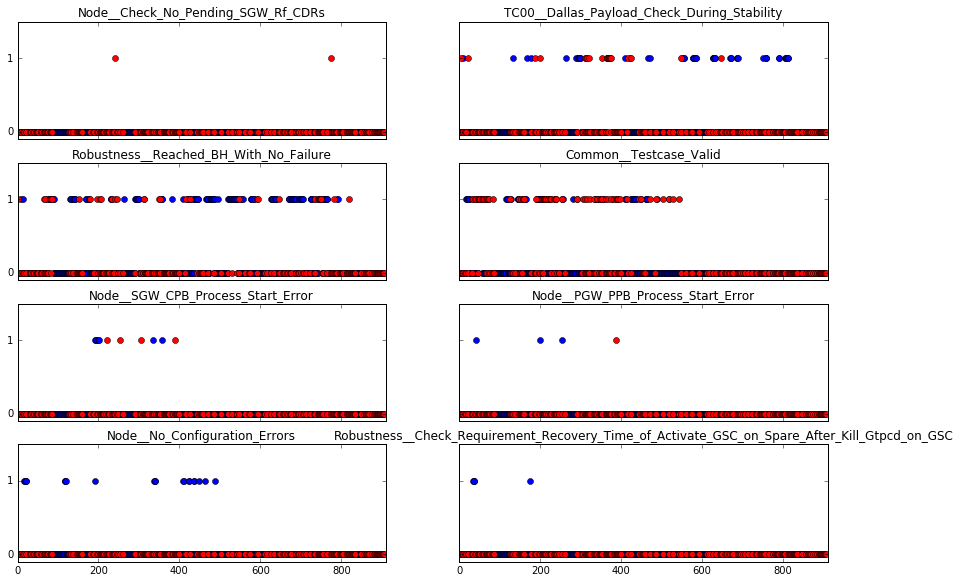

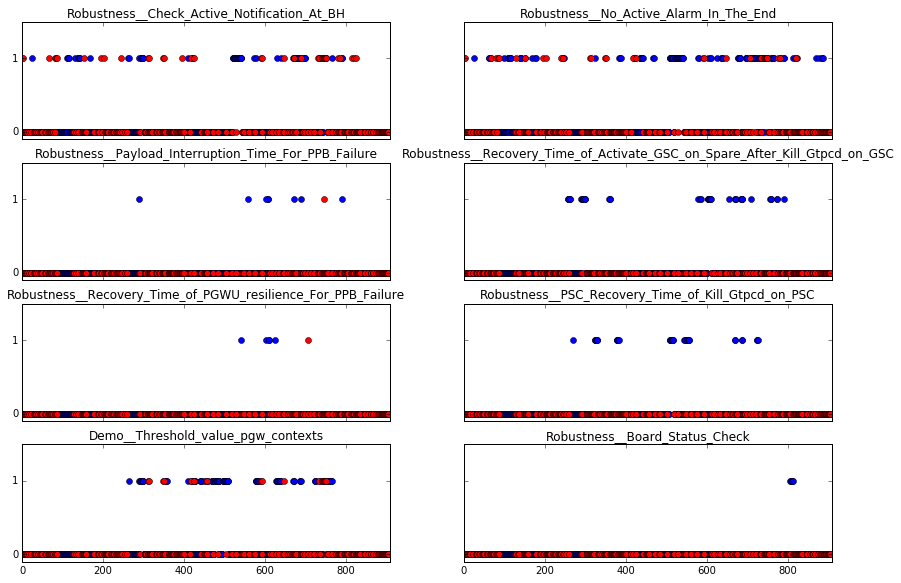

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

# Environment Failure
list_job_id_0 = [ index[0] for index, x in np.ndenumerate(array_failure_reason) if x ==0 ] 
# Bad Delivery
list_job_id_1 = [ index[0] for index, x in np.ndenumerate(array_failure_reason) if x ==1 ] 

for m in range(7):
    f, axarr = plt.subplots(4,2, sharex='col', sharey='row')
    plt.subplots_adjust(top=2, right=2)
    for n in range(8):
        i = n/2
        j = n%2
        # Bad Delivery = Blue, Env = Red
        axarr[i,j].plot(list_job_id_1, df_CP.iloc[list_job_id_1,n+m*8], 'bo', list_job_id_0, df_CP.iloc[list_job_id_0,n+m*8], 'ro')
        axarr[i,j].set_title(df_CP.columns[n+m*8])
        axarr[i,j].axis([0,910,-0.1, 1.5])
        axarr[i,j].set_yticks([0,1])
        

In [7]:
from sklearn import svm

def training_perdict(df_CP, array_failure_reason, **kargs):
    random_index = list(range(df_CP.shape[0]))
    np.random.shuffle(random_index)

### Select 800 samples as training set
### and the rest 106 as test set
    training_index = random_index[:800]
    testing_index = random_index[800:]
    training_CP = df_CP.iloc[training_index,]
    training_fr = array_failure_reason[training_index]
    test_CP = df_CP.iloc[testing_index,]
    test_fr = array_failure_reason[testing_index]

    ## Training
    clf = svm.LinearSVC(**kargs)
    clf.fit(training_CP,training_fr)
    
    ## Test
    predictions = [int(a) for a in clf.predict(test_CP)]
    num_correct = sum(int(a == y) for a, y in zip(predictions, test_fr))
    print("%s of %s (%.02f%%) values correct." % (num_correct, len(predictions),num_correct*100.0/len(predictions)))
    return num_correct*100.0/len(predictions)

for C in [1]:
    #print("C=%s" %C)
    correct_ratio = []
    for i in range(10):
        correct_ratio.append(training_perdict(df_CP, array_failure_reason, C=C, class_weight={1:2}))
    print("max:%.2f%%, mean:%.2f%%, min:%.2f%%" %(max(correct_ratio), sum(correct_ratio)/len(correct_ratio), min(correct_ratio)))


87 of 106 (82.08%) values correct.
92 of 106 (86.79%) values correct.
82 of 106 (77.36%) values correct.
81 of 106 (76.42%) values correct.
89 of 106 (83.96%) values correct.
86 of 106 (81.13%) values correct.
89 of 106 (83.96%) values correct.
92 of 106 (86.79%) values correct.
79 of 106 (74.53%) values correct.
85 of 106 (80.19%) values correct.
max:86.79%, mean:81.32%, min:74.53%


In [ ]:
### Training
from sklearn import svm
#clf = svm.SVC()

#sample_weight_new_100 = np.ones(training_CP.shape[0])
#sample_weight_new_100[:50] *=5
#clf.fit(training_CP,training_fr, sample_weight=sample_weight_new_100)
clf = svm.LinearSVC()
clf.fit(training_CP,training_fr)

In [ ]:
### Test
predictions = [int(a) for a in clf.predict(test_CP)]
num_correct = sum(int(a == y) for a, y in zip(predictions, test_fr))
print("%s of %s (%.02f%%) values correct." % (num_correct, len(predictions),num_correct*100/len(predictions)))

In [ ]:
# Display the difference
[(a,y) for a, y in zip(predictions, test_fr) if a !=y]

In [ ]:
### Create a random array
random_index = list(range(df_CP.shape[0]))
np.random.shuffle(random_index)

### Select 800 samples as training set
### and the rest 106 as test set
training_index = random_index[:800]
testing_index = random_index[800:]
training_CP = df_CP.iloc[training_index,]
#training_fr = df_failure_reason.iloc[training_index,]
training_fr = array_failure_reason[training_index]
test_CP = df_CP.iloc[testing_index,]
#test_fr = df_failure_reason.iloc[testing_index,]
test_fr = array_failure_reason[testing_index]

### choice first 100 as test set
test_CP = df_CP.iloc[:100]
test_fr = array_failure_reason[:100]
training_CP = df_CP[100:]
training_fr = array_failure_reason[100:]

In [ ]:
# Dump
import pickle
pickle.dump(df_CP, open("dump_df_CP", "wb"), True)
pickle.dump(df_failure_reason, open("dump_df_failure_reason", "wb"), True)

In [ ]:
# Load
import pickle
testjob_list = pickle.load(open("/lab/epg_team_builds/LSV/tmp/dump_testjob_hourly", 'rb'))

# Python 3
with open("/Users/Kimi/Downloads/dump_df_CP", 'rb') as f:
    df_CP = pickle.load(f, encoding='latin1')

In [ ]:
for i in range(906):
    a = df_failure_reason.iloc[i]
    for key in failure_reason_dict:
        if a[a>0].index == key:
            array_failure_reason[i] = failure_reason_dict[key]
            break

In [ ]:
def remove_dots(data):
    for key in data.keys():
        if type(data[key]) is dict: data[key] = remove_dots(data[key])
        if '.' in key:
            data[key.replace('.', '_')] = data[key]
            del data[key]
    return data

